# 어레이 중심 프로그래밍

연산과 함수 호출에 사용되는 넘파이 어레이는 기본적으로 항목 단위로 연산과 함수 호출이 이루어진다.
넘파이 어레이의 이런 특징을 잘 활용하도록 유도하는 프로그래밍을 
__어레이 중심 프로그래밍__(array-oriented programming)이라 한다. 

**주요 내용**

- 유니버설 함수: 항목별 함수 적용
- 통계
- 정렬
- 선형대수
- 난수 생성

**기본 설정**

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt

# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 유니버설 함수

유니버설 함수는 어레이의 항목 각각에 대해 적용되는 함수이며, 반환값은 인자로 사용된 어레이와 
동일한 모양의 어레이로 구현된다.
유니버설 함수를 줄여서 __ufunc__라 부른다.
60개 이상의 유니버설 함수가 존재하며,
그중 상당수가 수학 관련 함수이다. 
모든 함수들의 리스트는 넘파이의 
[유니버설 함수 공식문서](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)에서
확인할 수 있다.
여기서는 예제를 통해 유니버설 함수의 활용법을 살펴본다.

먼저 (2, 5) 모양의 어레이를 하나 생성하자.

In [2]:
arr = np.arange(10).reshape((2,5))
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

**`np.sqrt()` 함수**

주어진 어레이 각 항목의 제곱근으로 이루어진 어레이가 반환된다.

In [3]:
np.sqrt(arr)

array([[0.    , 1.    , 1.4142, 1.7321, 2.    ],
       [2.2361, 2.4495, 2.6458, 2.8284, 3.    ]])

**`np.exp()` 함수**

주어진 어레이 각 항목을 지수로 사용하는 지수승의 값으로 이루어진 어레이가 반환된다.
단, 밑은 오일러 상수 `e`가 사용된다.

In [4]:
np.exp(arr)

array([[   1.    ,    2.7183,    7.3891,   20.0855,   54.5982],
       [ 148.4132,  403.4288, 1096.6332, 2980.958 , 8103.0839]])

**`np.maximum()` 함수**

여러 개의 어레이를 인자로 받는 함수에 대해서도 동일한 방식으로 작동한다.
예를 들어, `maximum()` 함수는 항목별 최댓값으로 이루어진 어레이를 반환한다.

In [5]:
x = np.random.randn(8).reshape((4, 2))
y = np.random.randn(8).reshape((4, 2))

In [6]:
x

array([[-0.2047,  0.4789],
       [-0.5194, -0.5557],
       [ 1.9658,  1.3934],
       [ 0.0929,  0.2817]])

In [7]:
y

array([[ 0.769 ,  1.2464],
       [ 1.0072, -1.2962],
       [ 0.275 ,  0.2289],
       [ 1.3529,  0.8864]])

In [8]:
np.maximum(x, y)

array([[ 0.769 ,  1.2464],
       [ 1.0072, -0.5557],
       [ 1.9658,  1.3934],
       [ 1.3529,  0.8864]])

**`np.divmod()` 함수**

여러 개의 어레이를 반환하는 유니버설 함수도 있다.
예를 들어, `divmod()` 함수는 어레이 나눗셈 실행 결과를 항목별 나눗셈의 몫으로 이루어진 어레이와
나머지로 이루어진 어레이의 튜플을 반환한다.

먼저 (2,4) 모양의 어레이를 하나 만들자.

In [9]:
arr = np.arange(10,32, 3).reshape((2,4))
arr

array([[10, 13, 16, 19],
       [22, 25, 28, 31]])

위 어레이를 3으로 나누면 모든 항목 각각에 대한 몫과 나머지를 각각 따로 모아 두 개의 어레이로 이루어진 튜플을 
반환한다.

In [10]:
np.divmod(arr, 3)

(array([[ 3,  4,  5,  6],
        [ 7,  8,  9, 10]]),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1]]))

두 어레이의 나눗셈도 가능하다.

In [11]:
arr2 = np.arange(2, 10).reshape((2,4))
arr2

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [12]:
np.divmod(arr, arr2)

(array([[5, 4, 4, 3],
        [3, 3, 3, 3]]),
 array([[0, 1, 0, 4],
        [4, 4, 4, 4]]))

부동소수점의 나눗셈에 대해서도 몫과 나머지를 구한다.

In [13]:
arr3 = np.arange(10,30, 2.5).reshape((2,4))
arr3

array([[10. , 12.5, 15. , 17.5],
       [20. , 22.5, 25. , 27.5]])

In [14]:
arr4 = np.arange(2, 4.3, 0.3).reshape((2,4))
arr4

array([[2. , 2.3, 2.6, 2.9],
       [3.2, 3.5, 3.8, 4.1]])

In [15]:
np.divmod(arr3, arr4)

(array([[5., 5., 5., 6.],
        [6., 6., 6., 6.]]),
 array([[0. , 1. , 2. , 0.1],
        [0.8, 1.5, 2.2, 2.9]]))

**예제: 2차원 격자 어레이**

어레이를 중심으로 프로그래밍을 하면 예를 들어 많은 `for` 반복문을 생략할 수 있으며,
결과적으로 보다 효율적으로 코드를 구현할 수 있다.
또한 구현된 프로그램은 리스트를 이용하는 프로그램보다 빠르고 메모리 효율적으로 실행된다.
여기서는 몇 가지 예제를 이용하여 어레이 중심 프로그래밍을 소개한다. 

아래 모양의 격자무뉘에 해당하는 2차원 어레이를 생성하고자 한다.
각 점의 좌표는 -1과 1사이의 값을 20개의 구간으로 균등하게 나눈 값들이다. 
즉, 가로 세로 모두 21개의 점으로 구성된다.

__주의사항:__ `for` 반복문을 전혀 사용하지 않아야 한다.

<div align="center" border="1px"><img src="https://github.com/codingalzi/pydata/blob/master/notebooks/images/graphs/meshgrid20x20.png?raw=true" style="width:400px;"></div>

먼저 `arange()` 함수를 이용하여 -1와 1 사이의 구간을 20개의 구간으로 균등하게 
나누는 어레이를 생성하려면
아래에서 처럼 -1에서 1.1 이전까지 0.1 스텝으로 증가하는 값들로 이루어진 어레이를 생성하면 된다.

In [16]:
points = np.arange(-1, 1.1, 0.1) # -1부터 1.1 전까지 0.1 스텝으로 증가하는 값들의 어레이 생성

points

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

**`np.meshgrid()` 함수**

`meshgrid()` 함수는 지정된 1차원 어레이 두 개를 이용하여 격자무늬의 좌표를 생성한다.
즉, 격자에 사용되는 점들의 x 좌표와 y 좌표를 따로따로 모아 두 개의 어레이를 반환한다.

In [17]:
xs, ys = np.meshgrid(points, points)

In [18]:
xs

array([[-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],

In [19]:
ys

array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
        -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
       [-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,
        -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8,
        -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7,
        -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7],
       [-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
        -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
       [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4],

xs와 ys를 이용하여 산점도를 그리면 원하는 격자무늬가 얻어진다. 

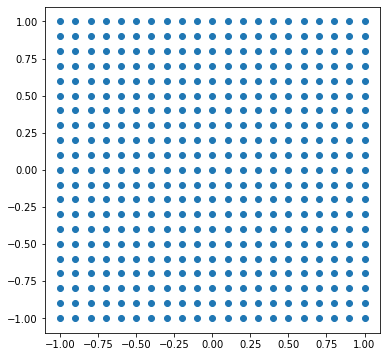

In [20]:
# 도표 크기 지정
plt.rc('figure', figsize=(6, 6))

# 산점도 그리기
plt.scatter(xs, ys)
plt.show()

__예제:__ 2차원 이미지 그리기

xs와 ys 각각의 제곱을 합하여 제곱근을 구하면 21x21 크기의 대칭 어레이가 얻어진다. 

In [21]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [22]:
z.shape

(21, 21)

`z`를 흑백사진으로 표현하면 다음과 같다.
`21x21` 크기의 해상도를 가진 흑백사진의 명암 대비를 쉽게 알아볼 수 있는 사진이 생성된다.

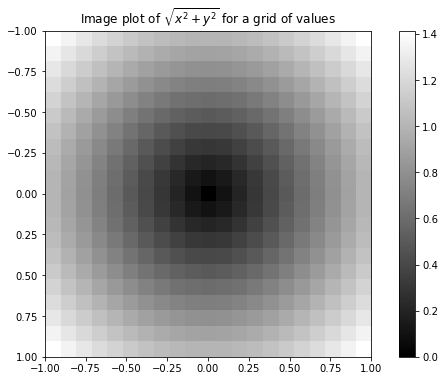

In [23]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(10, 6))

# 흑백사진으로 보여주도록 함.
plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 1, -1])
# 컬러바(색상 지도)도 보여줄 수 있음.
plt.colorbar()
# 도표 타이틀 지정(한글 지원은 좀 복잡함)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

__참고:__ 위 두 예제를 넘파이 어레이가 아니라 리스트와 `for` 반복문을 이용하여 구현하려고
시도하면 훨씬 많은 일을 해야 함을 어렵지 않게 알 수 있을 것이다.

**예제**

-1부터 1사이의 구간은 0.02 크기로 총 100개의 구간으로 구성한 다음에 동일한 그래프를 그리면 훨씬 더 
섬세한 사진을 얻는다.

In [24]:
points = np.arange(-1, 1.01, 0.02) # -1부터 1.1 전까지 0.02 스텝으로 증가하는 101 개의 값들로 이루어진 어레이 생성

In [25]:
points.shape

(101,)

`meshgrid()` 함수를 이용하여 메쉬 생성에 필요한 x 좌표와 y 좌표 모음을 만든다.

In [26]:
xs, ys = np.meshgrid(points, points)

`xs` 와 `ys` 각각 (101, 101) 모양의 2차원 어레이다. 

In [27]:
xs.shape

(101, 101)

In [28]:
ys.shape

(101, 101)

xs와 ys를 이용하여 산점도를 그리면 한 장의 색종이를 얻는다.
이유는 픽셀이 촘촘하기 때문이다. 

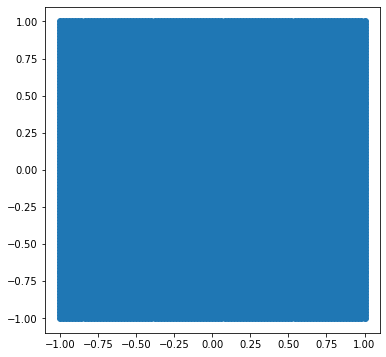

In [29]:
# 도표 크기 지정
plt.rc('figure', figsize=(6, 6))

# 산점도 그리기
plt.scatter(xs, ys)
plt.show()

등고선 모양의 이미지를 생성하기 위해 xs와 ys 각각의 제곱을 합하여 제곱근을 구하면 101x101 모양의
2차원 대칭 어레이가 얻어진다. 

In [30]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [31]:
z.shape

(101, 101)

`z`를 흑백사진으로 표현하면 다음과 같다.

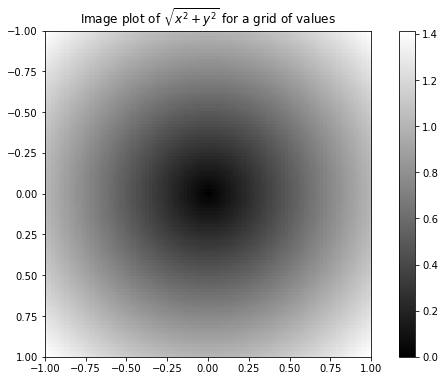

In [32]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(10, 6))

# 흑백사진으로 보여주도록 함.
plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 1, -1])
# 컬러바(색상 지도)도 보여줄 수 있음.
plt.colorbar()
# 도표 타이틀 지정(한글 지원은 좀 복잡함)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

## 통계

넘파이 어레이에 사용된 항목들의 합(sum), 평균값(mean), 표준편차(std) 등 기본 통계함수를 지원한다.

연습을 위해 먼저 (3, 3) 모양의 어레이를 무작위로 생성한다.

In [33]:
arr = np.arange(1, 7).reshape(2, 3)
arr

array([[1, 2, 3],
       [4, 5, 6]])

**`mean()` 메서드**

어레이에 포함된 모든 값들의 평균값을 계산한다.

In [34]:
arr.mean()

3.5

__참고:__ `np.mean()` 함수를 호출하면 어레이 객체에 포함된 `mean()` 메서드가 사용된다.

In [35]:
np.mean(arr)

3.5

**`sum()` 메서드**

어레이에 포함된 모든 값들의 합을 계산한다.

In [36]:
arr.sum()

21

**`cumsum()` 메서드**

어레이에 포함된 모든 값들의 누적합을 계산한다.

In [37]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21])

**`cumprod()` 메서드**

어레이에 포함된 모든 값들의 누적곱을 계산한다.

In [38]:
arr.cumprod()

array([  1,   2,   6,  24, 120, 720])

**축(axis) 활용**

앞서 언급된 모든 함수는 축(axis)을 이용한 함수 적용도 지원한다.
즉, 축을 지정하여 축에 따른 결과를 모든 어레이를 생성한다.
축 지정은 `axis` 키워드 인자를 사용한다.

* `axis=0`: 행을 기준으로 함수 적용
* `axis=1`: 열을 기준으로 함수 적용

**평균값**

* 열별 평균값 계산: 행을 따라 평균값을 계산해야 하기에 `axis=0` 지정.

In [39]:
arr.mean(axis=0)

array([2.5, 3.5, 4.5])

* 행별 평균값 계산: 열을 따라 평균값을 계산해야 하기에 `axis=1` 지정.

In [40]:
arr.mean(axis=1)

array([2., 5.])

**합**

* 열별 항목의 합 계산: 행을 따라 항목들의 합을 계산해야 하기에 `axis=0` 지정.

In [41]:
arr.sum(axis=0)

array([5, 7, 9])

* 행별 항목의 합 계산: 열을 따라 항목들의 합을 계산해야 하기에 `axis=1` 지정.

In [42]:
arr.sum(axis=1)

array([ 6, 15])

**누적합**

* 열별 항목의 누적합 계산: 행을 따라 항목들의 누적합을 계산해야 하기에 `axis=0` 지정.

In [43]:
arr.cumsum(axis=0)

array([[1, 2, 3],
       [5, 7, 9]])

* 행별 항목의 누적합 계산: 열을 따라 항목들의 누적합을 계산해야 하기에 `axis=1` 지정.

In [44]:
arr.cumsum(axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

**누적곱**

* 열별 항목의 누적곱 계산: 행을 따라 항목들의 누적곱을 계산해야 하기에 `axis=0` 지정.

In [45]:
arr.cumprod(axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

* 행별 항목의 누적곱 계산: 열을 따라 항목들의 누적곱을 계산해야 하기에 `axis=1` 지정.

In [46]:
arr.cumprod(axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

## 부울 어레이

**참인 항목의 개수**

특정 조건을 만족하는 항목들의 개수를 구하는 과정은 다음과 같다.

* 부울 연산식을 이용하여 조건 구현
* `sum()` 메서드 활용 가능. 이유는 `True`는 1, `False`는 0으로 간주되기 때문임.

아래 코드는 임의로 생성된 100개의 부동소수점 중에서 양수의 개수를 계산한다.

In [47]:
arr = np.random.randn(100)

In [48]:
(arr > 0).sum()

50

**`any()`와 `all()` 메서드**

* `any()` 메서드: 부울 어레이에 포함된 항목이 하나라도 참이면 참을 반환
* `all()` 메서드: 부울 어레이에 포함된 항목이 모두 참일 때만 참을 반환

In [49]:
bools = np.array([False, False, True, False])

In [50]:
bools.any()

True

In [51]:
bools.all()

False

## 정렬

**`sort()` 메서드**

정해진 축을 기준으로 오름차순으로 정열할 때 사용한다. 
물론 1차원 어레이는 축을 지정할 필요가 없다.

In [52]:
arr = np.random.randn(6)
arr

array([ 0.2205, -0.1934,  0.6692, -1.649 , -2.2528, -1.1668])

In [53]:
arr.sort()
arr

array([-2.2528, -1.649 , -1.1668, -0.1934,  0.2205,  0.6692])

다차원 어레이는 축을 이용하여 행 또는 열 기준으로 정렬할 수 있다.

In [54]:
arr = np.random.randn(5, 3)
arr

array([[ 0.3536,  0.7021, -0.2746],
       [-0.1391,  0.1077, -0.6065],
       [-0.4171, -0.017 , -1.2241],
       [-1.8008,  1.6347,  0.989 ],
       [ 0.4579,  0.5552,  1.3067]])

행을 따라 정렬하려면 인자 0을 사용한다.

In [55]:
arr.sort(0)
arr

array([[-1.8008, -0.017 , -1.2241],
       [-0.4171,  0.1077, -0.6065],
       [-0.1391,  0.5552, -0.2746],
       [ 0.3536,  0.7021,  0.989 ],
       [ 0.4579,  1.6347,  1.3067]])

__주의사항:__ (책의 설명과는 달리) `sort()` 메서드는 기존의 어레이를 직접 변환한다. 
즉, `arr`이 직접 변경된다. 

In [56]:
arr

array([[-1.8008, -0.017 , -1.2241],
       [-0.4171,  0.1077, -0.6065],
       [-0.1391,  0.5552, -0.2746],
       [ 0.3536,  0.7021,  0.989 ],
       [ 0.4579,  1.6347,  1.3067]])

열을 따라 정렬하려면 인자 1을 사용한다.

In [57]:
arr.sort(1)
arr

array([[-1.8008, -1.2241, -0.017 ],
       [-0.6065, -0.4171,  0.1077],
       [-0.2746, -0.1391,  0.5552],
       [ 0.3536,  0.7021,  0.989 ],
       [ 0.4579,  1.3067,  1.6347]])

**예제**

어레이에 사용된 값들의 백분위수를 정렬을 이용하여 쉽게 구할 수 있다.

예를 들어, 임의로 생성된 1,000개의 부동 소수점들 중에서 하위 5%에 해당하는 수를 구해보자.

In [58]:
large_arr = np.random.randn(1000)

먼저 정렬 한 다음에 하위 5%에 해당하는 위치를 구하여 인덱싱하면 바로 답이 나온다.

In [59]:
large_arr.sort()

하위 5%의 위치는 어레이의 길이에 0.05를 곱해준 값에 해당한다.
인덱스로 사용해야 하기에 정수로 형변환해주면 되며,
예상한 대로 50번 인덱스의 값을 가리킨다.

In [60]:
five_from_bottom = int(0.05 * len(large_arr))
five_from_bottom

50

따라서 하위 5%에 해당하는 값은 아래와 같다.

In [61]:
large_arr[five_from_bottom]

-1.4995034502869655

**`argmax()`/`argmin()` 메서드**

각각 지정된 축을 기준으로 항목들을 가장 큰/작은 값의 항목이 위치한 인덱스를 반환한다.

In [62]:
np.random.seed(18)
arr= np.random.randint(11, 99, (2,3))
arr

array([[53, 30, 80],
       [73, 60, 57]])

축을 지정하지 않으면 전체 항목을 대상으로 하며,
반환된 값은 어레이를 1차원으로 변환했을 때의 순서를 보여준다.

아래 결과인 5는 5번 인덱스, 여기서는 마지막에 사용된 항목을 가리킨다.

In [63]:
arr.argmax()

2

In [64]:
arr.argmin()

1

축을 지정하면 축별로 인덱스를 반환한다.

예를 들어, 열별 최대 값이 위치한 인덱스는 당연히 1이 나온다.
이유는 1번 행(둘쨋줄)의 값이 0번 행(첫째줄)의 값들보다 모두 크기 때문이다.

In [65]:
arr.argmax(0)

array([1, 1, 0])

In [66]:
arr.argmin(0)

array([0, 0, 1])

반면에 행별 최대 값이 위치한 인덱스는 비슷한 이유로 2이다. 

In [67]:
arr.argmax(1)

array([2, 0])

In [68]:
arr.argmin(1)

array([1, 2])

**예제: 붓꽃 데이터**

붓꽃(아이리스) 데이터를 이용하여 활용법을 살펴 보기 위해
먼저 데이터를 인터넷 상에서 가져온다. 

In [69]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

위 주소의 `iris.data` 파일을 `datasets/iris/`라는 하위 디렉토리에 저장한다.

In [70]:
import os
import urllib.request

PATH = './datasets/iris/'
os.makedirs(PATH, exist_ok=True)
urllib.request.urlretrieve(url, PATH+'iris.data')

('./datasets/iris/iris.data', <http.client.HTTPMessage at 0x7ff11cfb4370>)

다운로드된 `iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다. 

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

In [71]:
!cat datasets/iris/iris.data | head -n 5

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


이 중에 마지막 품종 특성은 문자열이고 나머지 특성은 부동소수점, 즉 수치형 데이터이다. 
여기서는 연습을 위해 수치형 데이터를 담고 있는 네 개의 특성만 가져온다.

* `genfromtxt()` 함수: 인터넷 또는 로컬에 저장된 텍스트 데이터를 적절한 모양의 어레이로 불러오는 함수
* `delimiter=','`: 쉼표를 특성값들을 구분하는 기준으로 지정
* `usecols=[0,1,2,3]`: 리스트에 지정된 인덱스의 특성만 가져오기

In [72]:
iris_2d = np.genfromtxt(PATH+'iris.data', delimiter=',', dtype='float', usecols=[0,1,2,3])

In [73]:
iris_2d.shape

(150, 4)

처음 5개의 샘플은 앞서 살펴본 것과 동일하다.
이번에는 다만 2차원 어레이로 보일 뿐이다.

In [74]:
iris_2d[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**문제** 

2차원 어레이에서 결측치(`nan`)를 전혀 갖지 않은 행만 선택하는 함수 `drop_2d()`를 정의해보자. 

**견본 답안**

`iris_2d` 어레이를 이용하여 `drop_2d()` 함수를 어떻게 정의해야 할지 살펴보자.
먼저 `iris_2d` 어레이에 누락치의 존재 여부를 판단해야 한다.

`np.isnan()` 함수는 누락치가 있는 위치는 `True`, 나머지 위치는 `False`를 갖는 부울 어레이를 생성한다.

In [75]:
np.isnan(iris_2d)[:5]

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

만약 결측치가 있다면 `True`가 한 번 이상 사용되었기에 `any()` 메서드를 이용하여 
누착치의 존재 여부를 판단할 수 있다.

In [76]:
np.isnan(iris_2d).any()

False

그런데 누락치가 전혀 없다. 따라서 하나의 누락치를 임의로 만들어 보자.
예를 들어, 처음 5개 샘플의 꽃잎 너비(3번 열)의 값을 `nan`으로 대체하자.

In [77]:
iris_2d[:5,3] = None

In [78]:
iris_2d[:10]

array([[5.1, 3.5, 1.4, nan],
       [4.9, 3. , 1.4, nan],
       [4.7, 3.2, 1.3, nan],
       [4.6, 3.1, 1.5, nan],
       [5. , 3.6, 1.4, nan],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

이제 누락치가 존재하기에 `any()` 메서드는 `True`를 반환한다.

In [79]:
np.isnan(iris_2d).any()

True

`sum()` 함수를 이용하여 5개의 누락치가 있음을 정확하게 파악할 수도 있다. 

* `sum()` 함수: `True`는 1, `False`는 0으로 처리한다.

In [80]:
np.sum(np.isnan(iris_2d))

5

`sum()` 메서드를 사용할 수도 있다.

In [81]:
np.isnan(iris_2d).sum()

5

행 단위로 누락치의 존재를 찾기 위해 행별로 `sum()` 함수를 실행한다. 
즉, 축을 1로 지정한다.

In [82]:
np.sum(np.isnan(iris_2d), axis=1)[:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

정확히 150개의 행에 대한 누락치 존재 여부를 보여준다.

In [83]:
np.sum(np.isnan(iris_2d), axis=1).shape

(150,)

이제 위 코드와 부울 인덱싱을 활용하여 누락치가 없는 행만 추출할 수 있다.

In [84]:
mask = np.sum(np.isnan(iris_2d), axis=1) == 0

In [85]:
iris_2d[mask].shape

(145, 4)

위 어레이의 처음 5개의 샘플 데이터는 `iris_2d` 어레이에서 5번에서 9번 인덱스에 위치한 샘플 데이터와 동일하다.

In [86]:
iris_2d[mask][:5]

array([[5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

이제 `drop_2d()` 함수를 다음과 같이 정의할 수 있다.

In [87]:
def drop_2d(arr_2d):
    mask = np.isnan(arr_2d).sum(axis=1) == 0
    return arr_2d[mask]

`iris_2d`에 위 함수를 적용하면 이전과 동일한 결과를 얻는다.

In [88]:
drop_2d(iris_2d)[:5]

array([[5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

**문제** 

iris_2d 데이터셋에 사용된 붓꽃들의 품종은 아래 세 개이다.

In [89]:
a = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

150개의 품종을 무작위로 선택하되 `Iris-setosa` 품종이 다른 품종들의 두 배로 선택되도록 하라.

힌트: `np.random.choice()` 함수를 활용하라.

**견본답안**

`np.random.choice()` 함수의 `p` 키워드 인자를 이용한다.
사용되는 인자는 `[0.5, 0.25, 0.25]` 이다.

In [90]:
np.random.seed(42)  # 무작위성 시드 지정
species_out = np.random.choice(a, 150, p=[0.5, 0.25, 0.25])

세 개의 이름 중에서 무작위로 150개의 이름을 선택하였다.

In [91]:
species_out.shape

(150,)

품종별 비율은 대략적으로 2:1:1 이다.

In [92]:
setosa_ratio = (species_out == 'Iris-setosa').sum()/150
versicolor_ratio = (species_out == 'Iris-versicolor').sum()/150
virginica_ratio = (species_out == 'Iris-virginica').sum()/150

print(f"세토사, 버시컬러, 비르지니카 세 품종의 비율은 {setosa_ratio:.2f}:{versicolor_ratio:.2f}:{virginica_ratio:.2f} 이다.")

세토사, 버시컬러, 비르지니카 세 품종의 비율은 0.53:0.21:0.25 이다.


## 선형 대수

행렬 곱셈, 전치 행렬, 역행렬 등을 2차원 어레이로 계산하는 방식을 
간단한 예제를 이용하여 소개한다.

**행렬곱**

먼저 두 개의 행렬을 2차원 어레이로 구현하자.
행렬 `x`는 (2, 3) 모양의 2차원 어레이다.

$$
\text{x} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

In [93]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

행렬 `y`는 (3, 2) 모양의 2차원 어레이다.

$$
\text{y} = 
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
$$

In [94]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

두 행렬의 곱 `x y`는 `dot()` 메서드를 이용하여 구한다.
결과는 (2, 2) 모양의 어레이다.

$$
\text{x y} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
=
\begin{bmatrix}
28 & 64\\
67 & 181
\end{bmatrix}
$$

In [95]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`np.dot()` 함수를 이용해도 동일한 결과를 얻는다.

In [96]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

**`@` 연산자**

`np.dot()` 함수 대신 `@` 기호를 중위 연산자로 사용할 수 있다.

In [97]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

**전치 어레이와 전치 행렬**

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

$$
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix}^{\,T}
=
\begin{bmatrix}
    1 & 3 & 5 \\
    2 & 4 & 6
\end{bmatrix}
$$

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

In [98]:
x = np.arange(1, 7).reshape((3, 2))
x

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 행렬은 전치 어레이로 구현된다.
전치 어레이는 기존 어레이의 축을 교환하며, 뷰를 이용한다.
즉, 새로운 어레이를 생성하지 않고 기존 어레이를 읽어오는 방식을 달리한다.

In [99]:
x.T

array([[1, 3, 5],
       [2, 4, 6]])

In [100]:
y = np.arange(-6, 0).reshape((2, 3))
y

array([[-6, -5, -4],
       [-3, -2, -1]])

In [101]:
y.T

array([[-6, -3],
       [-5, -2],
       [-4, -1]])

`x y`의 전치 행렬은 `y`의 전치 행렬과 `x`의 전치 행렬의 곱이다.

In [102]:
((x @ y).T == y.T @ x.T).all()

True

**역행렬**

역행렬은 `numpy.linalg` 모듈에 포함된 `inv()` 함수를 이용하여 구한다.

In [103]:
from numpy.linalg import inv

X = np.random.randn(5, 5)
X

array([[-0.1924,  0.3015, -0.0347, -1.1687,  1.1428],
       [ 0.7519,  0.791 , -0.9094,  1.4028, -1.4019],
       [ 0.5869,  2.1905, -0.9905, -0.5663,  0.0997],
       [-0.5035, -1.5507,  0.0686, -1.0623,  0.4736],
       [-0.9194,  1.5499, -0.7833, -0.3221,  0.8135]])

In [104]:
inv(X)

array([[ 1.8396,  0.914 , -0.3551, -0.4065, -0.7291],
       [-0.8325, -0.6671,  0.5273, -0.2824,  0.1198],
       [-1.3581, -1.403 ,  0.4893, -0.5424, -0.2539],
       [ 1.587 ,  1.0625, -1.1981, -0.6912,  0.1507],
       [ 2.986 ,  1.3738, -1.4092, -0.7172, -0.008 ]])

`X @ (inv(X))` 거의 항등 함수로 계산된다.

__참고:__ 컴퓨터를 이용한 부동소수점 연산은 완벽함과 거리가 아주 멀다.

In [105]:
X @ (inv(X))

array([[ 1., -0., -0.,  0., -0.],
       [-0.,  1., -0., -0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [-0., -0.,  0.,  1., -0.],
       [-0., -0.,  0.,  0.,  1.]])

`numpy.linalg` 모듈에서 제공하는 선형대수 관련 함수들은 [NumPy: 선형 대수](https://numpy.org/doc/stable/reference/routines.linalg.html)에서 
찾아볼 수 있다.

## 난수 생성

가장 많이 사용된 무작위 수 생성함수 3개와 시드(seed)의 역할을 살펴본다.

**`np.random.randn()` 함수**

임의의 부동소수점을 표준 정규 분포를 따르면서 지정된 수만큼 생성한다.

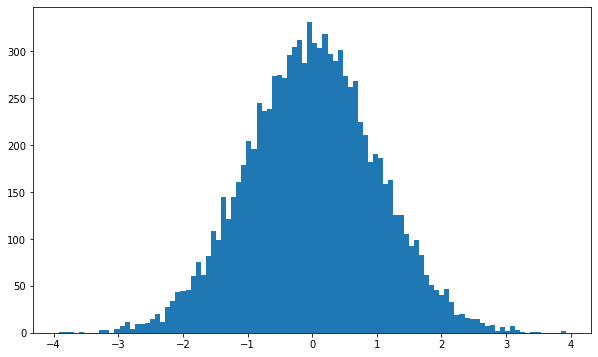

In [106]:
samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

**`np.random.rand()` 함수**

0과 1사의 임의의 부동소수점을 균등 분포를 따르면서 지정된 수만큼 생성한다.

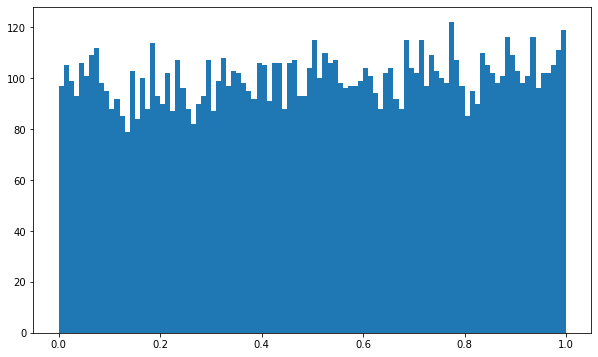

In [107]:
samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

**`np.random.randint()` 함수**

지정된 구간 사이에서 임의의 정수를 균등 분포를 따르면서 지정된 수만큼 생성한다.

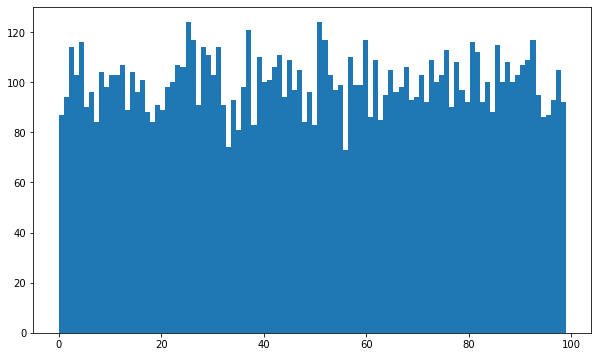

In [108]:
samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

**시드(seed)**

위에서 살펴본 무작위 함수들은 모두 실행할 때마다 조금씩 다른 무작위수를 생성한다.
하지만 시드를 지정하면 무작위 수도 동일하게 결정된다.
시드는 컴퓨터가 사용하는 난수표(random number table)의 특정 지점을 지정하는 역할을 수행한다.

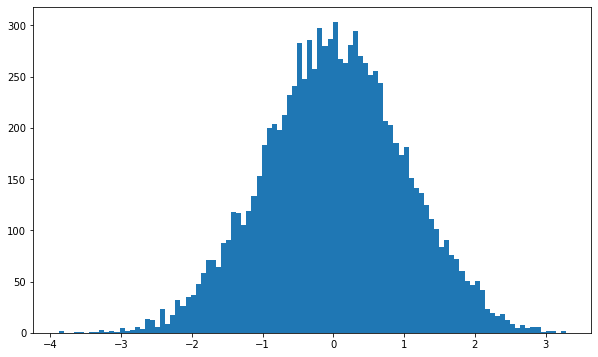

In [109]:
np.random.seed(1234)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

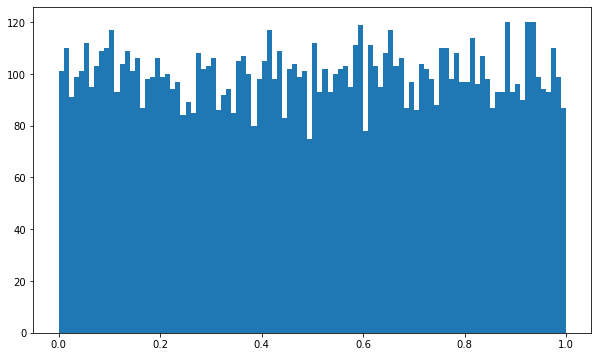

In [110]:
np.random.seed(1234)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

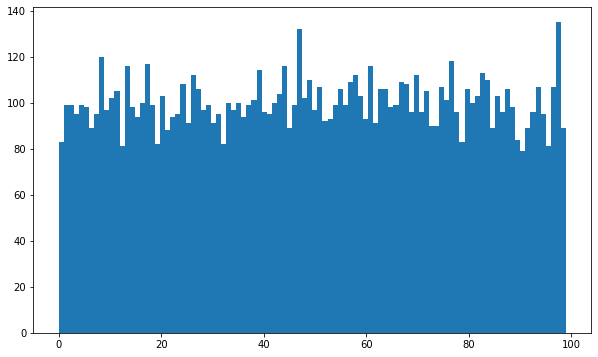

In [111]:
np.random.seed(1234)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

## 연습 문제

참고: [(실습) 어레이 중심 프로그래밍](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-array_oriented.ipynb)